In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# from HelperFunctions import minibatch 
%reload_ext autoreload
%autoreload 
from HelperFunctions import minibatch 

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
ols = LinearRegression()
ridge = Ridge()
lasso  = Lasso()
elasticnet = ElasticNet()

from sklearn import tree
regressor = tree.DecisionTreeRegressor()

from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()
bagging = ensemble.BaggingRegressor()
gbm = ensemble.GradientBoostingRegressor()
abr = ensemble.AdaBoostRegressor()

import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
df=pd.read_csv('lean_df_4.csv',index_col='id')

/home/auscheng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/auscheng/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.head()

,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_derog_record,derog_records,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,collection_amt,install_util,all_util,rev_credit,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mths_since_RecentAcc_opened,all_accs_120days+_PastDue_ever,accs_90days+_PastDue_24m,accs_opened_past_12m,pct_acc_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_credit,install_credit,fico,Outstanding_mortgage_debt,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac,loan_duration,profit,RANDOM
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,36,13.99,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,debt_consolidation,190xx,PA,5.91,0.0,2003-08-01,30.0,NaN,0.0,29.7,13.0,w,0.0,30.0,Individual,NaN,NaN,NaN,0.0,722.0,36.0,34.0,9300.0,4.0,0.0,0.0,3.0,2.0,0.0,3.0,76.9,0.0,0.0,178050.0,13734.0,677.0,137158.0,0.692308,0.230769,0.076923,0.555556,0.400000,0.444444,0.666667,0.444444,0.538462,1127 days 00:00:00.000000000,4421.723917,0.952901
68355089,24700.0,36,11.99,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,small_business,577xx,SD,16.06,1.0,1999-12-01,6.0,NaN,0.0,19.2,38.0,w,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,73.0,29.0,111800.0,6.0,0.0,0.0,2.0,0.0,0.0,2.0,97.4,0.0,0.0,314017.0,24667.0,717.0,164921.0,0.710526,0.157895,0.105263,0.629630,0.294118,0.185185,0.166667,0.740741,0.578947,183 days 00:00:00.000000000,25679.660000,0.743162
68341763,20000.0,60,10.78,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,2015-12-01,Fully Paid,home_improvement,605xx,IL,10.78,0.0,2000-08-01,NaN,NaN,0.0,56.2,18.0,w,0.0,NaN,Joint App,71000.0,13.85,Not Verified,0.0,0.0,73.0,65.0,14000.0,1.0,0.0,0.0,14.0,0.0,0.0,0.0,100.0,0.0,0.0,218418.0,14877.0,697.0,171003.0,0.388889,0.333333,0.277778,0.571429,0.500000,0.428571,0.166667,0.571429,0.333333,548 days 00:00:00.000000000,22705.924294,0.119479
66310712,35000.0,60,14.85,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,2015-12-01,Current,debt_consolidation,076xx,NJ,17.06,0.0,2008-09-01,NaN,NaN,0.0,11.6,17.0,w,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,70.0,45.0,67300.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,100.0,0.0,0.0,381215.0,18000.0,787.0,249274.0,0.764706,0.117647,0.058824,0.769231,0.400000,0.384615,0.500000,0.769231,0.764706,1158 days 00:00:00.000000000,31464.010000,0.050002
68476807,10400.0,60,22.45,F,F1,3 years,MORTGAGE,104433.0,Source Verified,2015-12-01,Fully Paid,major_purchase,174xx,PA,25.37,1.0,1998-06-01,12.0,NaN,0.0,64.5,35.0,w,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,84.0,78.0,34000.0,3.0,0.0,0.0,4.0,0.0,0.0,4.0,96.6,0.0,0.0,439570.0,88097.0,697.0,235962.0,0.542857,0.285714,0.171429,0.473684,0.444444,0.315789,0.300000,0.368421,0.342857,213 days 00:00:00.000000000,11740.500000,0.731115


/home/auscheng/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


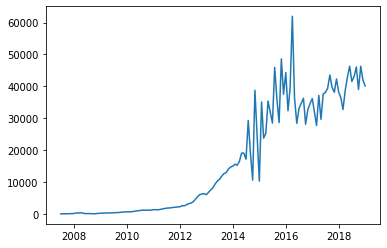

In [6]:
df.issue_d=pd.to_datetime(df.issue_d)
time_df=df.set_index('issue_d')
resampled_time_df=time_df.resample('M').count()
plt.plot(resampled_time_df.index,resampled_time_df.funded_amnt)

In [ ]:
from sklearn import ensemble
randomForest = ensemble.RandomForestRegressor()
gbm = ensemble.GradientBoostingRegressor()
abr = ensemble.AdaBoostRegressor()
import xgboost as xgb
import lightgbm as lgb

In [ ]:
np.random.sample()

In [ ]:
randomForest.set_params(n_estimators=200,criterion="mse",bootstrap=True,oob_score = False,n_jobs=-1,random_state=0,\
                       max_depth=5,max_features=5)
randomForest.fit(trainX,trainY)
feature_importance=pd.Series(randomForest.feature_importances_,index=trainX.columns)
feature_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10,10))
sns.barplot(x=feature_importance.index[0:20],y=feature_importance.values[0:20])
plt.xticks(rotation=90)

In [ ]:
def FUNC1(df1,df2,df3,df4):
    

In [ ]:
def HoldOutSplit(features,target,percent):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=percent,random_state=0)
    return x_train

In [ ]:
param_grid = {
    'max_depth' : range(5,20),\
    'max_features': range(5,20)
}
randomForest = ensemble.RandomForestRegressor()
grid_search_forest = GridSearchCV(ensemble.RandomForestRegressor(n_estimators=100,criterion="mse",\
                                                                 min_samples_leaf=2,min_samples_split=2,\
                                                                 bootstrap=True,oob_score = True,n_jobs=-1),\
                                  param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,refit=True)
%time grid_search_forest.fit(trainX, trainY)

# Print results    
print('Best parameters: {}'.format(grid_search_forest.best_params_))
print('Best MSE Score: {0:.3f}'.format(-grid_search_forest.best_score_)) # NOTE: it is negated! (Sklearn convention)
print('MSE Score on training data set (using best parameters): {0:.3f}'.format(-grid_search_forest.score(trainX, trainY)))
print('MSE Score on test data set (using best parameters): {0:.3f}'.format(-grid_search_forest.score(testX, testY)))
print('RMSE in $$ on test data set (using best parameters): {0:.1f}'.format(\
      np.mean((np.exp(grid_search_forest.predict(testX))-np.exp(testY))**2)**0.5))

In [ ]:
xplot=list(param_grid['max_depth'])
yplot=list(param_grid['max_features'])
zplot=-1*grid_search_forest.cv_results_['mean_test_score'].reshape(len(yplot),-1) # NOTE: it is negated! (Sklearn convention)
plt.pcolor(xplot,yplot,zplot,cmap='RdBu')
plt.colorbar();
plt.xlabel('Maximum Tree Depth');
plt.ylabel('Max Features to Consider for Each Split');

In [ ]:
number_estimators = range(10,110,10)
train_error = []
test_error = []
for i in number_estimators:
    randomForest.set_params(n_estimators=i,criterion="mse",bootstrap=True,oob_score = False,n_jobs=-1,random_state=0,\
                       max_depth=grid_search_forest.best_params_['max_depth'],max_features=grid_search_forest.best_params_['max_features'])
    randomForest.fit(trainX, trainY)
    train_error.append(metrics.mean_squared_error(trainY, randomForest.predict(trainX))) 
    test_error.append(metrics.mean_squared_error(testY, randomForest.predict(testX))) 
import matplotlib.pyplot as plt
plt.plot(number_estimators, train_error, c='red', label='training error')
plt.plot(number_estimators, test_error, c='blue', label='test error')
plt.ylabel('MSE')
plt.xlabel('Number of Trees')
plt.legend()
plt.show()

In [ ]:
#visualize best predictors
randomForest.set_params(n_estimators=100,criterion="mse",bootstrap=True,oob_score = False,n_jobs=-1,random_state=0,\
                       max_depth=grid_search_forest.best_params_['max_depth'],max_features=grid_search_forest.best_params_['max_features'])
randomForest.fit(trainX,trainY)
feature_importance=pd.Series(randomForest.feature_importances_,index=trainX.columns)
feature_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10,10))
sns.barplot(x=feature_importance.index[0:20],y=feature_importance.values[0:20])
plt.xticks(rotation=90)